In [1]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

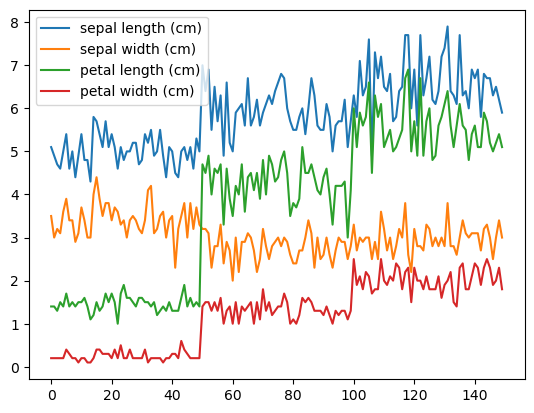

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [3]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

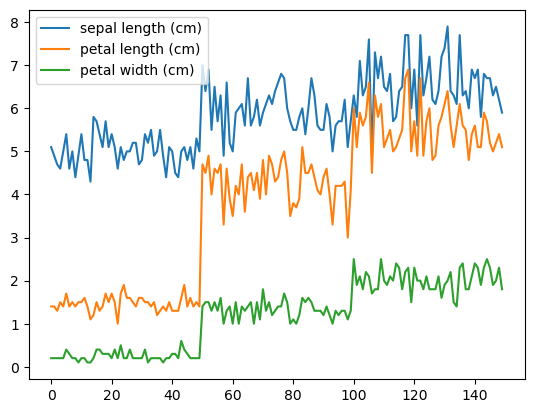

In [4]:
selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X)

plt.plot(X_selected)
plt.legend(np.array(iris.feature_names)[selector.get_support()])

In [5]:
from sklearn.feature_selection import SelectKBest , chi2 , mutual_info_classif , f_classif , mutual_info_regression

In [6]:
chi2(X,y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [9]:
selector = SelectKBest(chi2 , k=2)
selector.fit_transform(X,y)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [8]:
selector.get_support()

array([False, False,  True,  True])

In [22]:
print("---------SelectFromModel----------")
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

---------SelectFromModel----------


In [16]:
selector = SelectFromModel(
    SGDClassifier(random_state=0),
    threshold="mean"
)
selector.fit_transform(X,y)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [14]:
selector.get_support()

array([False, False,  True,  True])

In [18]:
selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [20]:
selector.estimator_.coef_.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

In [21]:
selector.estimator_.coef_.mean(axis=0).mean()

-0.9721175565229512

In [23]:
print("---------RFE|RFECV----------")
from sklearn.feature_selection import RFECV , RFE

---------RFE|RFECV----------


In [68]:
selector = RFECV(SGDClassifier(),step=1,min_features_to_select=2,cv=5)

selector.fit(X,y)
selector.ranking_

array([2, 1, 1, 1])

In [70]:
selector.grid_scores_.mean(axis=0)

array([0.77777778, 0.9       , 0.88888889, 0.82222222, 0.75555556])

In [72]:
selector.grid_scores_.mean(axis=1)

array([0.74      , 0.89333333, 0.85333333])

In [73]:
selector.grid_scores_

array([[0.66666667, 0.9       , 0.9       , 0.9       , 0.33333333],
       [0.96666667, 0.9       , 0.83333333, 0.8       , 0.96666667],
       [0.7       , 0.9       , 0.93333333, 0.76666667, 0.96666667]])